# Analysis of lift and drag coefficients

In [1]:
from glob import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import torch as pt
from stl import mesh
from scipy.signal import welch
from flowtorch.data import FOAMDataloader, mask_box
from utils import fetch_force_coefficients, interpolate_uniform_1D

mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

run = "/media/andre/Elements/naca0012_shock_buffet/run/"
# run = "../run/"
output = "./output/"
!mkdir -p output

print("Matplolib version: ", mpl.__version__)
print("Numpy version: ", np.__version__)

Matplolib version:  3.3.3
Numpy version:  1.19.5


In [2]:
Ma = 0.75
U_inf = 255.22
a_inf = U_inf / Ma
chord = 0.6010500

## Raw lift and drag data
### Pre-onset conditions

In [23]:
cases = glob(run + "rhoCF_set1_alpha2_*")
cases = [case.split("/")[-1] for case in cases]

Found 1 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_saiddes_ref0/postProcessing/forces/
Found 1 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_saiddes_ref0_tan0/postProcessing/forces/
Found 1 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_saiddes_ref1/postProcessing/forces/
Found 2 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_saiddes_ref2/postProcessing/forces/
Found 1 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_saiddes_wf_g100/postProcessing/forces/
Found 1 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_saiddes_wf_g150/postProcessing/forces/
Found 1 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha2_saiddes_wf_g50/postProcessing/forces/
Found 1 time folders in path /media/andre/Elements/naca0012_shock_buff

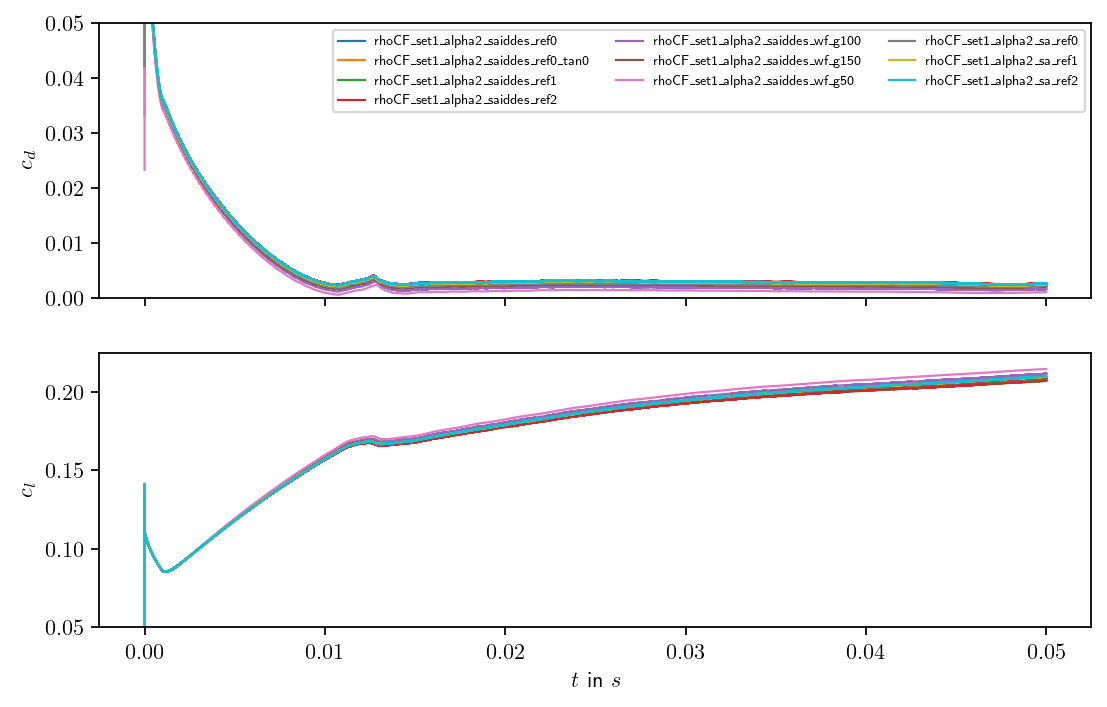

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

lw = 1.0
every = 5

for i, case in enumerate(cases):
    path = run + case + "/postProcessing/forces/"
    t, cd, cl = fetch_force_coefficients(path)
    ax1.plot(t[::every], cd[::every], c="C{:d}".format(i), lw=lw, label=r"{:s}".format(case.replace("_", "\_")))
    ax2.plot(t[::every], cl[::every], c="C{:d}".format(i), lw=lw)
ax1.legend(fontsize=6, ncol=3, loc=1)
ax1.set_ylabel(r"$c_d$")
ax2.set_ylabel(r"$c_l$")
ax2.set_xlabel(r"$t$ in $s$")
ax1.set_ylim(0.0, 0.05)
ax2.set_ylim(0.05, 0.225)
plt.show()

### Buffet conditions, 2D

In [25]:
cases = glob(run + "rhoCF_set1_alpha4_*")
cases = [case.split("/")[-1] for case in cases if "z" not in case]

Found 4 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref0/postProcessing/forces/
Found 3 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref0_tan0/postProcessing/forces/
Found 5 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref1/postProcessing/forces/
Found 7 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref2/postProcessing/forces/
Found 1 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_wf_g100/postProcessing/forces/
Found 1 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_wf_g150/postProcessing/forces/
Found 1 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_wf_g50/postProcessing/forces/
Found 1 time folders in path /media/andre/Elements/naca0012_shock_buff

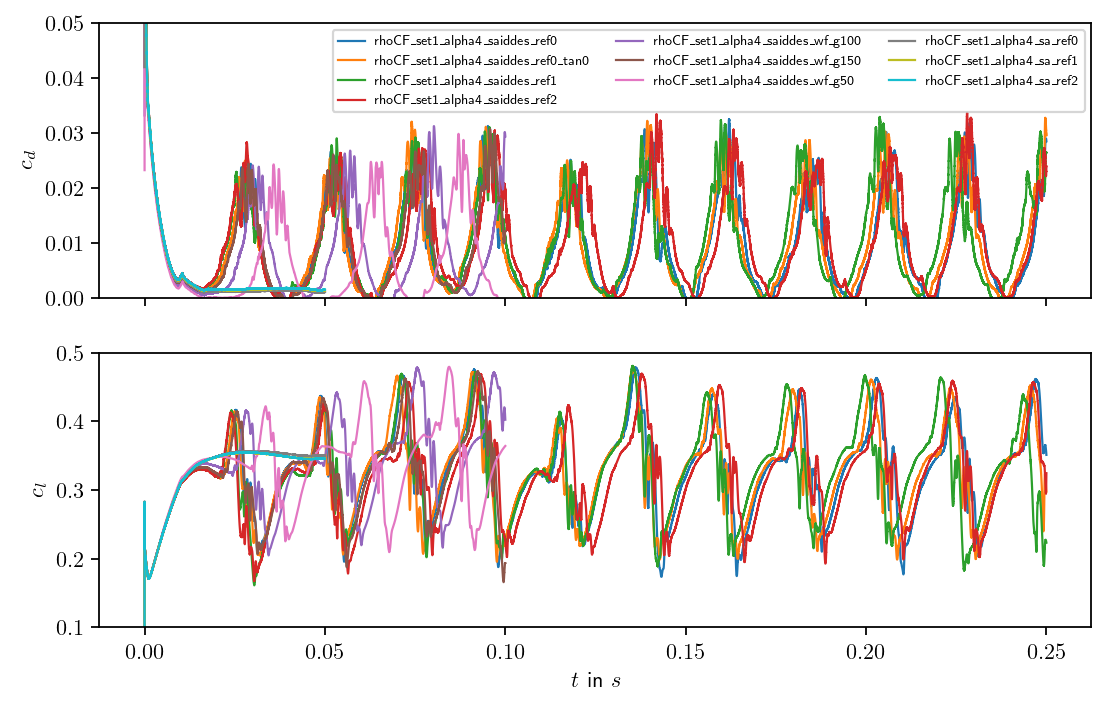

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

lw = 1.0
every = 5

for i, case in enumerate(cases):
    path = run + case + "/postProcessing/forces/"
    t, cd, cl = fetch_force_coefficients(path)
    ax1.plot(t[::every], cd[::every], c="C{:d}".format(i), lw=lw, label=r"{:s}".format(case.replace("_", "\_")))
    ax2.plot(t[::every], cl[::every], c="C{:d}".format(i), lw=lw)
ax1.legend(fontsize=6, ncol=3, loc=1)
ax1.set_ylabel(r"$c_d$")
ax2.set_ylabel(r"$c_l$")
ax2.set_xlabel(r"$t$ in $s$")
ax1.set_ylim(0.0, 0.05)
ax2.set_ylim(0.1, 0.5)
plt.show()

### Buffet conditions, 3D

In [3]:
cases = glob(run + "rhoCF_set1_alpha4_*z*")
cases = [case.split("/")[-1] for case in cases]

Found 13 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref0_z25/postProcessing/forces/
Found 11 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref0_z50/postProcessing/forces/
Found 12 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref1_z25/postProcessing/forces/


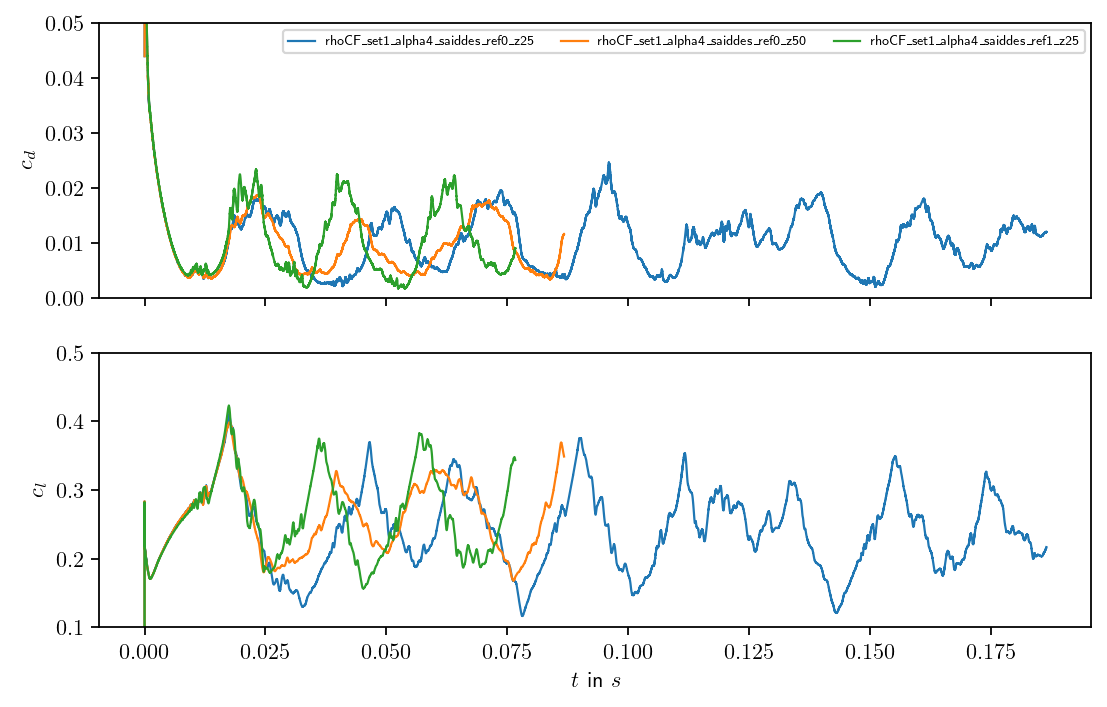

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

lw = 1.0
every = 5

for i, case in enumerate(cases):
    path = run + case + "/postProcessing/forces/"
    t, cd, cl = fetch_force_coefficients(path)
    # forgot to adjust area in coefficient computation in OpenFOAM for z50 case; area should be twice as large
    fac = 0.5 if "z50" in case else 1.0
    ax1.plot(t[::every], cd[::every]*fac, c="C{:d}".format(i), lw=lw, label=r"{:s}".format(case.replace("_", "\_")))
    ax2.plot(t[::every], cl[::every]*fac, c="C{:d}".format(i), lw=lw)
ax1.legend(fontsize=6, ncol=3, loc=1)
ax1.set_ylabel(r"$c_d$")
ax2.set_ylabel(r"$c_l$")
ax2.set_xlabel(r"$t$ in $s$")
ax1.set_ylim(0.0, 0.05)
ax2.set_ylim(0.1, 0.5)
plt.show()

## Mesh dependency of extracted frequency spectrum

### Buffet conditions, 2D

In [62]:
cases_2D = [f"rhoCF_set1_alpha4_saiddes_ref{ref}" for ref in [0, 1, 2]]
every = 500
signals = {}
for case in cases_2D:
    path = run + case + "/postProcessing/forces/"
    t, _, cl = fetch_force_coefficients(path)
    t, cl = interpolate_uniform_1D(t[::every], cl[::every], 20000)
    signals[case] = (t, cl)

Found 4 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref0/postProcessing/forces/
Found 5 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref1/postProcessing/forces/
Found 7 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref2/postProcessing/forces/


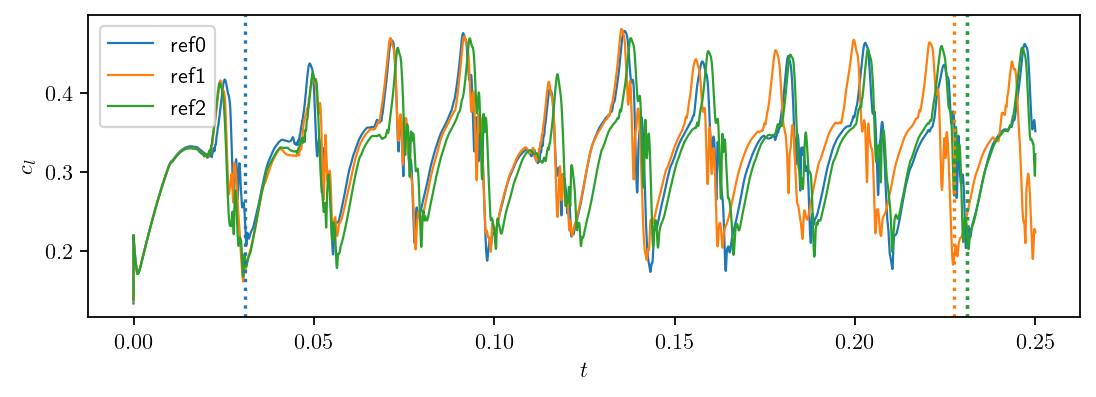

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(8, 2.5))

for key in signals.keys():
    t, cl = signals[key]
    ax.plot(t, cl, lw=1, label=key.split("_")[-1])
    
#ax.axvline(0.164, ls=":", color="C0")
ax.axvline(0.031, ls=":", color="C0")
ax.axvline(0.231, ls=":", color="C0")
#ax.axvline(0.163, ls=":", color="C1")
ax.axvline(0.2275, ls=":", color="C1")
#ax.axvline(0.166, ls=":", color="C2")
ax.axvline(0.231, ls=":", color="C2")
ax.legend()
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$c_l$")
plt.show()

In [8]:
def normalize_frequency(f):
    return 2*np.pi*chord*f/U_inf

Mean lift: 0.3268
Std. lift: 0.0652
Two largest freq.: 50.0035Hz, 47.5034Hz
Two largest freq. (dimensionless): 0.7399Hz, 0.7029Hz
Mean lift: 0.3277
Std. lift: 0.0660
Two largest freq.: 50.8940Hz, 48.3493Hz
Two largest freq. (dimensionless): 0.7531Hz, 0.7154Hz
Mean lift: 0.3229
Std. lift: 0.0642
Two largest freq.: 50.0037Hz, 52.5039Hz
Two largest freq. (dimensionless): 0.7399Hz, 0.7769Hz


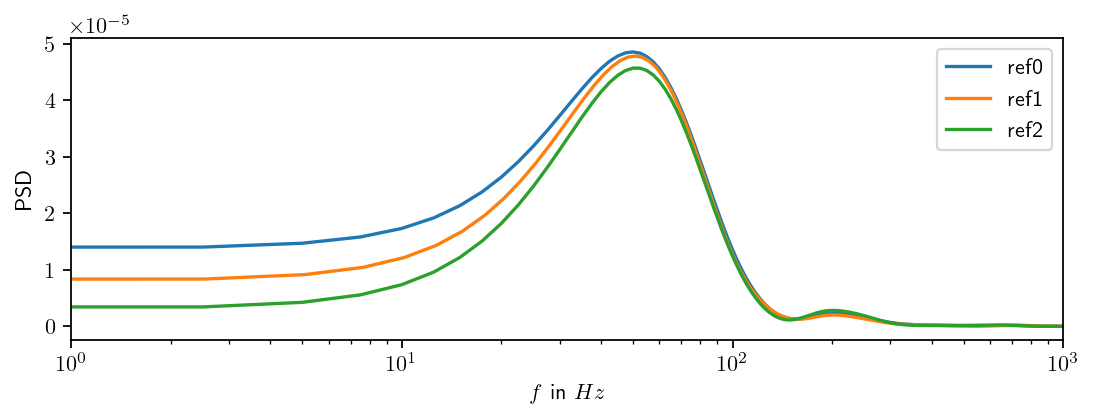

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(8, 2.5))

start_time = [0.031, 0.031, 0.031]
end_time = [0.231, 0.2275, 0.231]
n_cycles = 9

for i, key in enumerate(signals.keys()):
    t, cl = signals[key]
    dt = t[1] - t[0]
    fs = 20000/(t[-1]-t[0])
    start_idx = np.absolute(t-start_time[i]).argmin()
    end_idx = np.absolute(t-end_time[i]).argmin()
    points_interval = end_idx-start_idx
    nperseq = int(points_interval/n_cycles)
    f, amp = welch(cl[start_idx:end_idx].squeeze()-cl.squeeze()[start_idx:end_idx].mean(), fs=fs, nperseg=nperseq, nfft=2*points_interval)
    top_2 = amp.argsort()[-2:][::-1]
    print("Mean lift: {:2.4f}".format(cl.squeeze()[start_idx:end_idx].mean()))
    print("Std. lift: {:2.4f}".format(cl.squeeze()[start_idx:end_idx].std()))
    print("Two largest freq.: {:2.4f}Hz, {:2.4f}Hz".format(*f[top_2]))
    print("Two largest freq. (dimensionless): {:2.4f}Hz, {:2.4f}Hz".format(*normalize_frequency(f[top_2])))
    ax.plot(f, amp, label=key.split("_")[-1])
ax.set_xlim(1, 1000)
ax.set_xscale("log")
ax.set_xlabel(r"$f$ in $Hz$")
ax.set_ylabel(r"PSD")
ax.legend()
plt.show()

### Buffet conditions, 3D

In [5]:
cases_3D = [f"rhoCF_set1_alpha4_saiddes_ref{ref}_z25" for ref in [0]]

every = 100
signals_3D = {}
for case in cases_3D:
    path = run + case + "/postProcessing/forces/"
    t, _, cl = fetch_force_coefficients(path)
    t, cl = interpolate_uniform_1D(t[::every], cl[::every], 20000)
    signals_3D[case] = (t, cl)

Found 11 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref0_z25/postProcessing/forces/


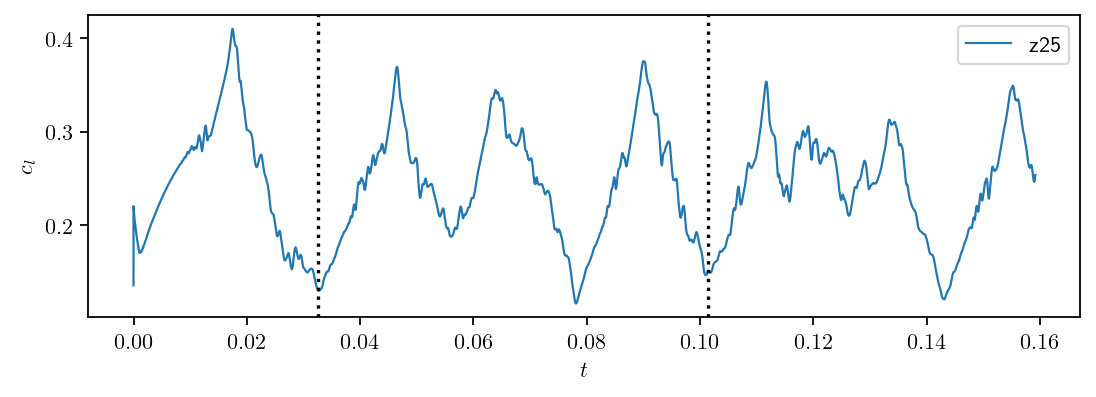

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 2.5))

for key in signals_3D.keys():
    t, cl = signals_3D[key]
    ax.plot(t, cl, lw=1, label=key.split("_")[-1])
ax.legend()
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$c_l$")
ax.axvline(0.0326, ls=":", color="k")
ax.axvline(0.1015, ls=":", color="k")
plt.show()

Two largest freq.: 43.4467Hz, 39.4970Hz
Two largest freq. (dimensionless): 0.6429, 0.5844


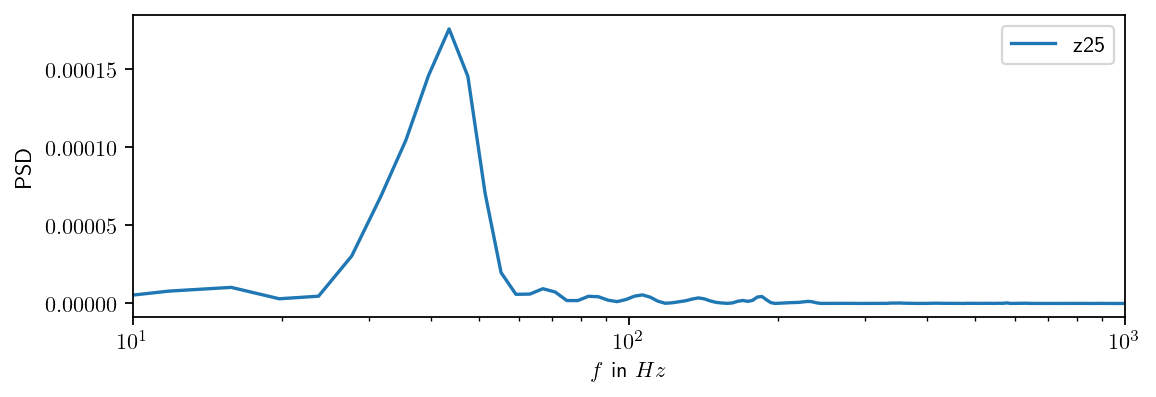

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 2.5))
n_cycles = 1

for key in signals_3D.keys():
    t, cl = signals_3D[key]
    dt = t[1] - t[0]
    fs = 20000/(t[-1]-t[0])
    start_idx = np.absolute(t-0.0326).argmin()
    #end_idx = np.absolute(t-0.1015).argmin()
    end_idx = np.absolute(t-2).argmin()
    points_interval = end_idx-start_idx
    nperseq = int(points_interval/n_cycles)
    f, amp = welch(cl[start_idx:end_idx].squeeze()-cl.squeeze()[start_idx:end_idx].mean(), fs=fs, nperseg=nperseq, nfft=points_interval*2)
    top_2 = amp.argsort()[-2:][::-1]
    print("Two largest freq.: {:2.4f}Hz, {:2.4f}Hz".format(*f[top_2]))
    print("Two largest freq. (dimensionless): {:2.4f}, {:2.4f}".format(*normalize_frequency(f[top_2])))
    ax.plot(f, amp, label=key.split("_")[-1])
ax.set_xlim(10, 1000)
ax.set_xscale("log")
ax.set_xlabel(r"$f$ in $Hz$")
ax.set_ylabel(r"PSD")
ax.legend()
plt.show()

## 2D versus 3D

In [7]:
case2D = f"{run}rhoCF_set1_alpha4_saiddes_ref0/postProcessing/forces/"
case3D = f"{run}rhoCF_set1_alpha4_saiddes_ref0_z25/postProcessing/forces/"

every = 100
t, _, cl = fetch_force_coefficients(case2D)
t_2D, cl_2D = interpolate_uniform_1D(t[::every], cl[::every], 20000)
t, _, cl = fetch_force_coefficients(case3D)
t_3D, cl_3D = interpolate_uniform_1D(t[::every], cl[::every], 20000)

Found 4 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref0/postProcessing/forces/
Found 8 time folders in path /media/andre/Elements/naca0012_shock_buffet/run/rhoCF_set1_alpha4_saiddes_ref0_z25/postProcessing/forces/


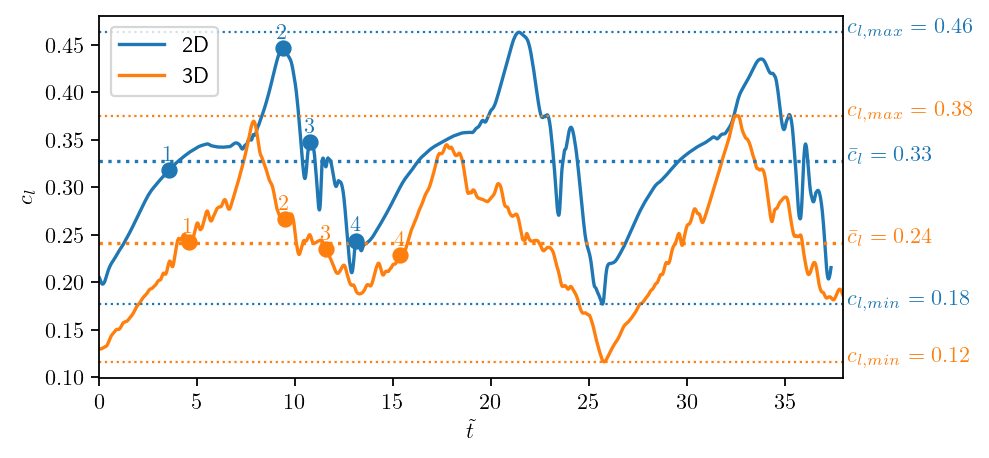

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

start_2D = np.absolute(t_2D-0.165).argmin()
start_3D = np.absolute(t_3D-0.0326).argmin()
end_2D = np.absolute(t_2D-0.231).argmin()
end_3D = np.absolute(t_3D-0.1015).argmin()

mark_2D = np.array([13700, 14520, 14720, 15050], dtype="int64")
mark_3D = np.array([6100, 7400, 7950, 8950], dtype="int64")

ax.plot((t_2D[start_2D:end_2D]-t_2D[start_2D])*a_inf/chord, cl_2D[start_2D:end_2D], lw=1.5, c="C0", label="2D")
ax.plot((t_3D[start_3D:end_3D]-t_3D[start_3D])*a_inf/chord, cl_3D[start_3D:end_3D], lw=1.5, c="C1", label="3D")
mean_2D = cl_2D[start_2D:end_2D].mean().item()
min_2D = cl_2D[start_2D:end_2D].min().item()
max_2D = cl_2D[start_2D:end_2D].max().item()
mean_3D = cl_3D[start_3D:end_3D].mean().item()
min_3D = cl_3D[start_3D:end_3D].min().item()
max_3D = cl_3D[start_3D:end_3D].max().item()
ax.axhline(mean_2D, ls=":", lw=1.5, c="C0")
ax.axhline(min_2D, ls=":", lw=1, c="C0")
ax.axhline(max_2D, ls=":", lw=1, c="C0")
ax.axhline(mean_3D, ls=":", lw=1.5, c="C1")
ax.axhline(min_3D, ls=":", lw=1, c="C1")
ax.axhline(max_3D, ls=":", lw=1, c="C1")
ax.text(38.2, mean_2D, r"$\bar{c}_l = " + "{:2.2f}$".format(round(mean_2D, 2)), c="C0")
ax.text(38.2, min_2D, r"$c_{l,min} = " + "{:2.2f}$".format(round(min_2D, 2)), c="C0")
ax.text(38.2, max_2D, r"$c_{l,max} = " + "{:2.2f}$".format(round(max_2D, 2)), c="C0")
ax.text(38.2, mean_3D, r"$\bar{c}_l = " + "{:2.2f}$".format(round(mean_3D, 2)), c="C1")
ax.text(38.2, min_3D, r"$c_{l,min} = " + "{:2.2f}$".format(round(min_3D, 2)), c="C1")
ax.text(38.2, max_3D, r"$c_{l,max} = " + "{:2.2f}$".format(round(max_3D, 2)), c="C1")
ax.scatter((t_2D[mark_2D]-t_2D[start_2D])*a_inf/chord, cl_2D[mark_2D], s=40, c="C0", zorder=6)
ax.scatter((t_3D[mark_3D]-t_3D[start_3D])*a_inf/chord, cl_3D[mark_3D], s=40, c="C1", zorder=6)

for i, (ti2D, ti3D) in enumerate(zip(mark_2D, mark_3D)):
    ax.text((t_2D[ti2D]-t_2D[start_2D])*a_inf/chord-0.3, cl_2D[ti2D]+0.01, r"${:d}$".format(i+1), c="C0")
    ax.text((t_3D[ti3D]-t_3D[start_3D])*a_inf/chord-0.3, cl_3D[ti3D]+0.01, r"${:d}$".format(i+1), c="C1")

ax.set_xlim(0, 38)
ax.set_xlabel(r"$\tilde{t}$")
ax.set_ylabel(r"$c_l$")
ax.legend()

plt.savefig(output + "set1_cl_2D_3D.svg", bbox_inches="tight")
plt.savefig(output + "set1_cl_2D_3D.pdf", bbox_inches="tight")

In [117]:
loader2D = FOAMDataloader(f"{run}rhoCF_set1_alpha4_saiddes_ref0/")
loader3D = FOAMDataloader(f"{run}rhoCF_set1_alpha4_saiddes_ref0_z25/")
loader3D._case._distributed = False
wt_2D = loader2D.write_times[1:]
wt_3D = loader3D.write_times[1:]
vert2D = loader2D.vertices
vert3D = loader3D.vertices

Loading precomputed cell centers and volumes from constant/


In [118]:
wt_2D_num = pt.tensor([float(t) for t in wt_2D])
wt_3D_num = pt.tensor([float(t) for t in wt_3D])

In [119]:
vert2D /= chord
# pick a slice from the middle spanwise position
mask2D = mask_box(vert2D[:, :2], [-1, -1], [3, 1])

x_2D = pt.masked_select(vert2D[:, 0], mask2D)
y_2D = pt.masked_select(vert2D[:, 1], mask2D)

In [120]:
vert3D /= chord
# pick a slice from the middle spanwise position
mask3D = mask_box(vert3D, [-1, -1, 0.0024042/chord], [3, 1, 0.0072126/chord])
print(mask3D.sum())

x_3D = pt.masked_select(vert3D[:, 0], mask3D)
y_3D = pt.masked_select(vert3D[:, 1], mask3D)

tensor(79706)


In [105]:
def add_naca0012_patch(axis, scale=1.0):
    x_up = naca_stl.x[naca_stl.y > 0] * scale
    y_up = naca_stl.y[naca_stl.y > 0] * scale
    x_low = naca_stl.x[naca_stl.y < 0] * scale
    y_low = naca_stl.y[naca_stl.y < 0] * scale
    axis.fill_between(x_up, 0.0, y_up, color="k")
    axis.fill_between(x_low, y_low, 0.0, color="k")
    
naca_stl = mesh.Mesh.from_file("../geometry/naca0012.stl")

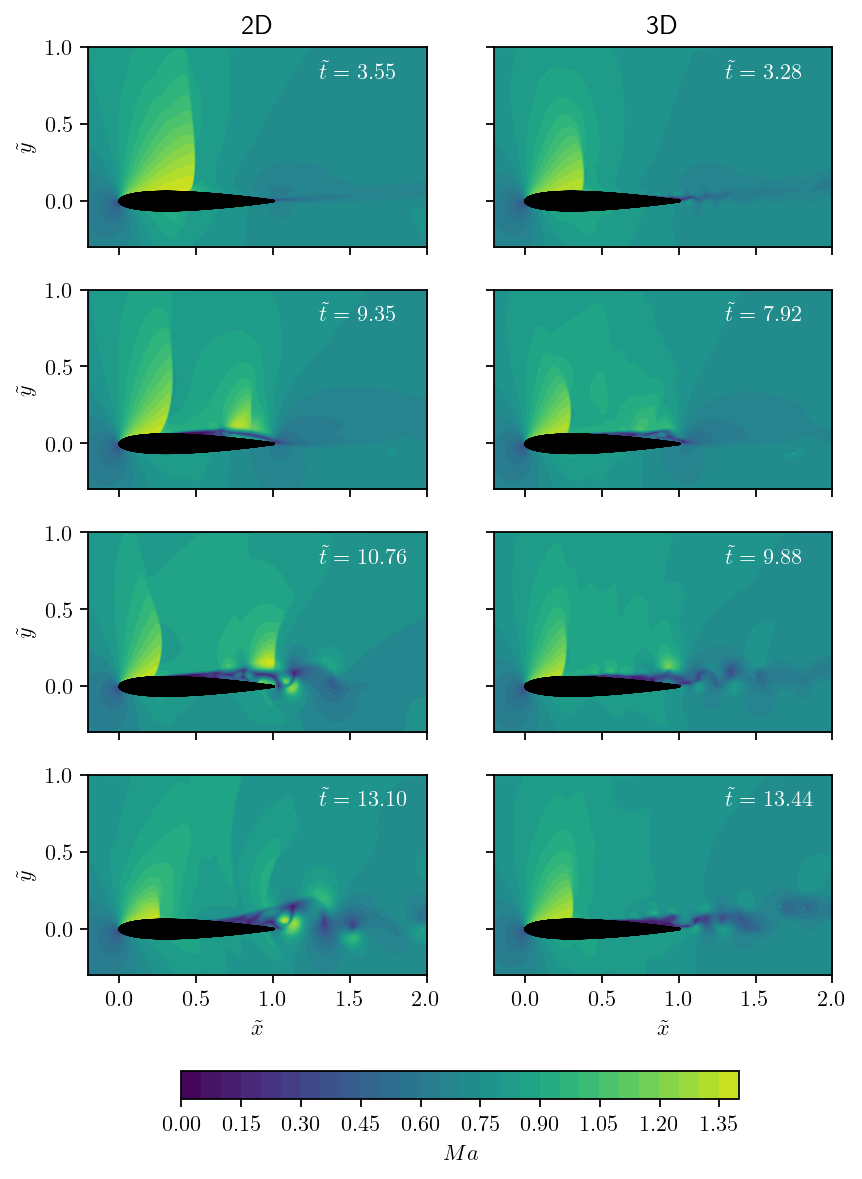

In [150]:
fig, axarr = plt.subplots(len(mark_2D), 2, figsize=(6, 2.5*len(mark_2D)), sharex=True, sharey=True)

for i, (ti2D, ti3D) in enumerate(zip(mark_2D, mark_3D)):
    t_str = str(round(t_2D[ti2D], 4))
    ma = loader2D.load_snapshot("Ma", t_str)
    ma = pt.masked_select(ma, mask2D)
    cont = axarr[i, 0].tricontourf(x_2D, y_2D, ma, levels=30, vmin=0.0, vmax=1.5)
    for c in cont.collections:
        c.set_edgecolor("face")
    axarr[i, 0].text(1.3, 0.8, r"$\tilde{t}=" + r"{:2.2f}$".format((t_2D[ti2D] - t_2D[start_2D])*a_inf/chord), c="w")
    axarr[i, 0].set_ylabel(r"$\tilde{y}$")
    t_str = str(round(t_3D[ti3D], 4))
    ma = loader3D.load_snapshot("Ma", t_str)
    ma = pt.masked_select(ma, mask3D)
    cont = axarr[i, 1].tricontourf(x_3D, y_3D, ma, levels=30, vmin=0.0, vmax=1.5)
    for c in cont.collections:
        c.set_edgecolor("face")
    axarr[i, 1].text(1.3, 0.8, r"$\tilde{t}=" + r"{:2.2f}$".format((t_3D[ti3D] - t_3D[start_3D])*a_inf/chord), c="w")
    for ax in axarr[i, :]:
        ax.set_aspect("equal")
        ax.set_xlim(-0.2, 2.0)
        ax.set_ylim(-0.3, 1.0)
        add_naca0012_patch(ax)
for ax in axarr[-1, :]:
    ax.set_xlabel(r"$\tilde{x}$")

cbar = fig.colorbar(cont, ax=axarr.ravel().tolist(), shrink=0.75, location="bottom", label=r"$Ma$", pad=0.08)

    
axarr[0, 0].set_title(r"2D")
axarr[0, 1].set_title(r"3D")
plt.savefig(output + "ma_buffet_cycle.png", bbox_inches="tight")